In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import sys
from astropy.table import Table
from astropy.io import fits
import astropy.cosmology
from astropy import units as u
from astropy.coordinates import SkyCoord, Angle
import healpy as hp
from healpy.newvisufunc import projview, newprojplot

sys.path.insert(0, '/home/aew492/lss-dipoles')
from dipole import dipole, thetaphi_to_radec, dipole_map

### load QUaia catalog

In [3]:
quasar_fn = '/scratch/aew492/quasars/catalogs/catalog_G20.0.fits'
data_quaia = Table.read(quasar_fn, format='fits')
ra, dec = data_quaia['ra'], data_quaia['dec']  # equatorial coordinates

In [4]:
# format into healpy map
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)
print(NPIX)
pix_idx = hp.ang2pix(NSIDE, ra, dec, lonlat=True)  # get pixel locations of each quasar
map_data = np.bincount(pix_idx, minlength=NPIX)  # bin these pixel indices to get qso number density in each pixel

49152


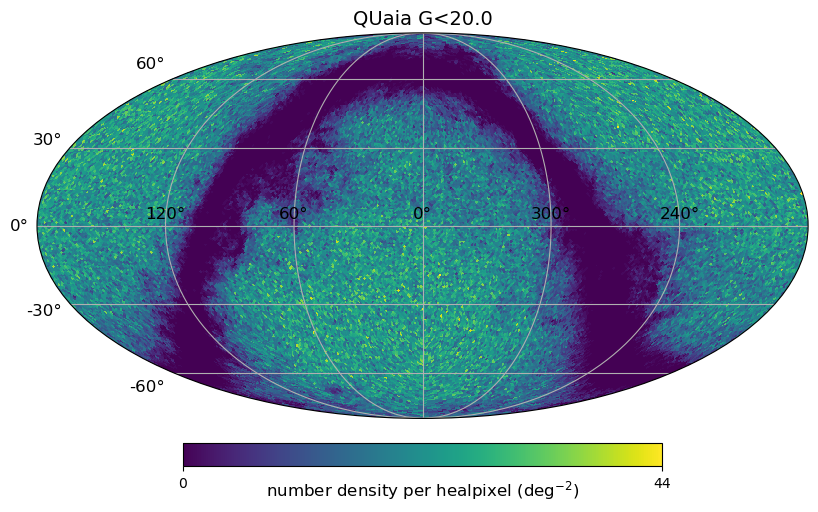

In [5]:
projview(map_data, title='QUaia G<20.0', projection_type='mollweide',
            unit=r"number density per healpixel (deg$^{-2}$)", coord=['E'], graticule=True, graticule_labels=True)

### fit dipole

In [15]:
# fit monopole and dipole:
map_nodipole, monopole, dipoleamps = hp.pixelfunc.remove_dipole(map_data.astype('float'), fitval=True)
print("monopole: ", monopole)
print("dipole: ", dipoleamps)

monopole:  15.3778076171875
dipole:  [-1.09741832  0.69853694  0.12679801]


In [16]:
# get (theta,phi) of the pixel locations
theta, phi = hp.pix2ang(NSIDE, ipix=np.arange(NPIX))
min(theta), max(theta), min(phi), max(phi)

(0.012757845597670932, 3.1288348079921224, 0.0, 6.270913460876501)

In [17]:
expected_dipole = dipole(theta, phi, *dipoleamps)

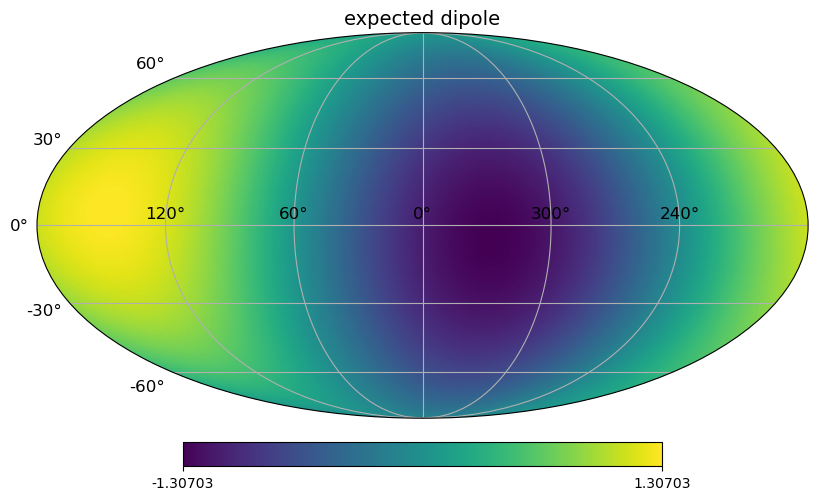

In [18]:
projview(expected_dipole, title='expected dipole', projection_type='mollweide',
         coord=['E'], graticule=True, graticule_labels=True)

#### check $\Rightarrow$ `dipole = map - map_nodip - monopole`

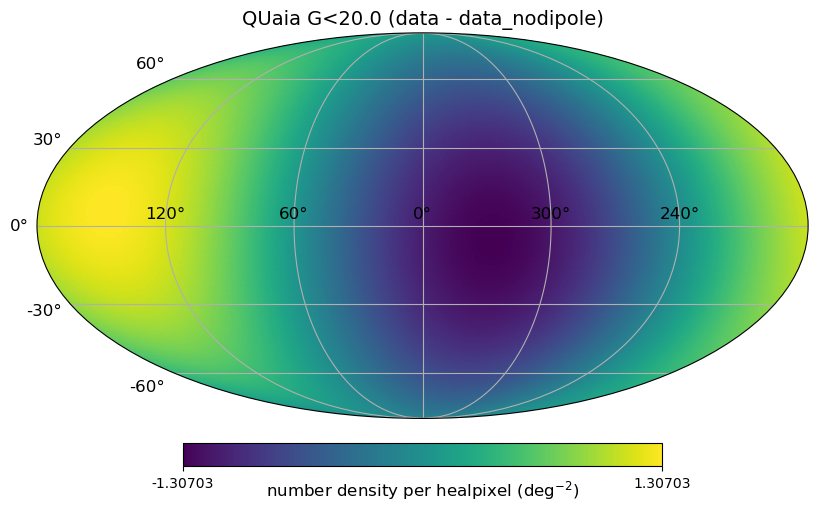

In [30]:
projview(map_data-map_nodipole-monopole, title='QUaia G<20.0 (data - data_nodipole)', projection_type='mollweide',
            unit=r"number density per healpixel (deg$^{-2}$)", coord=['E'],
         graticule=True, graticule_labels=True, flip='astro')